In [183]:
import math
from math import cos
from math import sin
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl

# 添加这条可以让图形显示中文，字体显示为黑体
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [185]:
# 联赛选择算子
def tournament_select(pops, popsize, fits, tournament_size):
    new_pops, new_fits = [], []
    # 步骤1 从群体中随机选择M个个体，计算每个个体的目标函数值
    while len(new_pops) < len(pops):
        tournament_list = random.sample(range(0, popsize), tournament_size)
        tournament_fit = [fits[i] for i in tournament_list]
        # 转化为df方便索引
        tournament_df = pd.DataFrame \
            ([tournament_list, tournament_fit]).transpose().sort_values(by=1).reset_index(drop=True)
        # 步骤2 根据每个个体的目标函数值，计算其适应度
        fit = tournament_df.iloc[0, 1]
        pop = pops[int(tournament_df.iloc[0, 0])]
        # 步骤3 选择适应度最大的个体
        new_pops.append(pop)
        new_fits.append(fit)
    return new_pops, new_fits

In [184]:
# 适应度的计算
def calFitness(line, dis_matrix):
    # 贪婪策略得到距离矩阵（解码过程）
    # 计算路径距离（评价函数）
    dis_sum = 0  # 路线距离
    dis = 0
    for i in range(len(line)):
        if i < len(line) - 1:
            # 依次计录一个数以及下一个数的距离，存入城市间的距离矩阵
            dis = dis_matrix.loc[line[i], line[i + 1]]
            dis_sum = dis_sum + dis
        else:
            # 最后一个数，无下一个数的情况
            dis = dis_matrix.loc[line[i], line[0]]
            dis_sum = dis_sum + dis
    # 返回城市间的路线距离矩阵
    return round(dis_sum, 1)

# 锦标赛赛选择
        pop1, fits1 = tournament_select(pops, popsize, fits, tournament_size)
        pop2, fits2 = tournament_select(pops, popsize, fits, tournament_size)
        # 交叉
        child_pops = crossover(popsize, pop1, pop2, pc)
        # 变异
        child_pops = mutate(child_pops, pm)

In [230]:
# 交叉算子
def crossover(popsize, parent1_pops, parent2_pops, pc):
    child_pops = []
    for i in range(popsize):
        # 初始化
        child = [None] * len(parent1_pops[i])
        parent1 = parent1_pops[i]
        parent2 = parent2_pops[i]
        if random.random() >= pc:
            child = parent1.copy()  # 随机生成一个（或者随机保留父代中的一个）
            random.shuffle(child)
        else:
            # parent1
            start_pos = random.randint(0, len(parent1) - 1)
            end_pos = random.randint(0, len(parent1) - 1)
            if start_pos > end_pos:
                tem_pop = start_pos
                start_pos = end_pos
                end_pos = tem_pop
            child[start_pos:end_pos + 1] = parent1[start_pos:end_pos + 1].copy()
            # parent2 -> child
            list1 = list(range(end_pos + 1, len(parent2)))
            list2 = list(range(0, start_pos))
            list_index = list1 + list2
            j = -1
            for i in list_index:
                for j in range(j + 1, len(parent2)):
                    if parent2[j] not in child:
                        child[i] = parent2[j]
                        break
        child_pops.append(child)
    return child_pops


NameError: name 'main' is not defined

In [187]:
# 变异操作
def mutate(pops, pm):
    pops_mutate = []
    for i in range(len(pops)):
        pop = pops[i].copy()
        # 随机多次成对变异
        # 随机选出两个位置进行交换
        t = random.randint(1, 5)
        count = 0
        while count < t:
            if random.random() < pm:
                mut_pos1 = random.randint(0, len(pop) - 1)
                mut_pos2 = random.randint(0, len(pop) - 1)
                #如果不相等则进行取反的操作，这里使用交换
                if mut_pos1 != mut_pos2:
                    tem = pop[mut_pos1]
                    pop[mut_pos1] = pop[mut_pos2]
                    pop[mut_pos2] = tem
            pops_mutate.append(pop)
            count += 1
    return pops_mutate

In [188]:
# 画路径图
def draw_path(line, CityCoordinates):
    x, y = [], []
    for i in line:
        Coordinate = CityCoordinates[i]
        x.append(Coordinate[0])
        y.append(Coordinate[1])
    x.append(x[0])
    y.append(y[0])
    plt.plot(x, y, 'b-', color='#FF3030', alpha=0.8, linewidth=2.2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [189]:
temp = pd.read_excel(io='./datamoni.xlsx', sheet_name='Sheet1', index_col=[0,1],usecols=[0,1])
temp = list(temp.index[0:])
temp.insert(0,(70,40))
CityCoordinates=[]
for x, y in temp:
    x = x*math.pi/180.0
    y = y*math.pi/180.0
    CityCoordinates.append([x, y])
print(CityCoordinates)

[[1.2217304763960306, 0.6981317007977318], [0.9374529931604463, 0.2671156607007242], [0.9868650096136576, 0.37382858182616147], [0.35089844611345994, 0.2697615798467476], [0.458005811649848, 0.3172310448424893], [0.49339410756328506, 0.5061646817001275], [0.156357066369164, 0.4304592800656214], [0.14227749529332576, 0.1663735109463595], [0.5576309506829362, 0.30771725508986825], [0.7600455106829788, 0.0681743059121505], [0.4175211543205875, 0.13317909390267932], [0.3753348009706325, 0.42046552476870197], [0.29874451740536545, 0.3496836969540719], [0.9096324448836566, 0.007134905982152819], [0.6559785087035648, 0.2940426004004927], [0.25255437875133546, 0.2380070594359627], [1.0242447262036203, 0.4738307119776805], [0.6707300315414209, 0.14773863052281602], [0.24069661181328603, 0.034051373706409364], [0.7134923435445338, 0.24954368579164526], [0.6972485641962226, 0.5150710968730545], [0.14107670876795364, 0.4829413306730909], [0.02355496358491547, 0.2938418875365133], [0.27457519792374

In [190]:
math.pi

3.141592653589793

In [191]:
str_list= pd.read_excel(io='./Start.xlsx', sheet_name='Sheet1')
str_list = list(str_list.columns)
#CityCoordinates = []
str_list.pop()
#str_list.append(1)
print(str_list)

#for ind in str_list:
    #print(ind)
    #CityCoordinates.append(data[ind-1])
print(CityCoordinates)

[0, 16, 34, 94, 92, 42, 35, 45, 58, 51, 100, 98, 20, 55, 99, 97, 37, 43, 79, 49, 50, 41, 14, 19, 29, 73, 82, 86, 91, 1, 66, 44, 2, 81, 47, 13, 26, 71, 9, 83, 17, 39, 78, 76, 30, 84, 63, 10, 68, 75, 93, 69, 64, 96, 59, 8, 4, 74, 32, 72, 3, 40, 90, 15, 60, 87, 56, 27, 48, 46, 77, 38, 7, 85, 61, 25, 65, 89, 33, 28, 62, 18, 23, 12, 31, 36, 70, 21, 6, 67, 24, 80, 57, 22, 11, 52, 53, 54, 95, 5]
[[1.2217304763960306, 0.6981317007977318], [0.9374529931604463, 0.2671156607007242], [0.9868650096136576, 0.37382858182616147], [0.35089844611345994, 0.2697615798467476], [0.458005811649848, 0.3172310448424893], [0.49339410756328506, 0.5061646817001275], [0.156357066369164, 0.4304592800656214], [0.14227749529332576, 0.1663735109463595], [0.5576309506829362, 0.30771725508986825], [0.7600455106829788, 0.0681743059121505], [0.4175211543205875, 0.13317909390267932], [0.3753348009706325, 0.42046552476870197], [0.29874451740536545, 0.3496836969540719], [0.9096324448836566, 0.007134905982152819], [0.65597850

In [192]:
dis_matrix = \
    pd.DataFrame(data=None, columns=range(len(CityCoordinates)), index=range(len(CityCoordinates)))
for i in range(len(CityCoordinates)):
    xi, yi = CityCoordinates[i][0], CityCoordinates[i][1]
    for j in range(len(CityCoordinates)):
        xj, yj = CityCoordinates[j][0], CityCoordinates[j][1]
        #dis_matrix.iloc[i, j] = round(math.sqrt((xi - xj) ** 2 + (yi - yj) ** 2), 2)
        #print(xi,xj,yi,yj)
        #print((math.cos(xi-xj)*math.cos(yi)*math.cos(yj)+math.sin(yi)*math.sin(yj)))
        a=math.cos(xi-xj)*math.cos(yi)*math.cos(yj)+math.sin(yi)*math.sin(yj)
        if a>1:
            print(a)
            a=1
        dis_matrix.iloc[i, j] = round(R*math.acos(a))
        #print(i,j)
        #print("###########")
print(dis_matrix)

1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
      0     1     2     3     4     5     6     7     8     9    ...   91   \
0       0  3168  2427  5524  4829  3974  5865  6940  4412  4812  ...  3179   
1    3168     0   742  3599  2939  3019  4769  4979  2333  1686  ...   139   
2    2427   742     0  3891  3185  2958  4858  5328  2608  2400  ...   755   
3    5524  3599  3891     0   720  1723  1549  1454  1285  2867  ...  3467   
4    4829  2939  3185   720     0  1221  1927  2174   607  2462  ...  2804   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
96   5735  2757  3410  2239  2136  3231  3785  2998  1925  1167  ...  2686   
97   3625  1956  2022  1956  1238  1092  2848  3410   795  2241  ...  1818   
98   3048  2049  1864  2477  1783  1117  3079  3906  1438  2755  ...  1923   
99   3527  2016  2027  2024  1311  1006  2831  3472   917  2384  ...  1880   
100  2978

In [280]:
#启发式算法
def expAl(line, exp):
    for turp in exp:
        p1=0
        p2=0
        for i in turp:
            if p1 == 0:
                p1 = line.index(i)
            else:
                p2 = line.index(i)
                if p2>p1:
                    print(p1,p2,line[p1],line[p2])
                    temp = line[p1+1:p2+1]
                    temp.reverse()
                    line[p1+1:p2+1] = temp
                else:
                    p2 = line.index(i)
                    print(p1,p2,line[p1],line[p2])
                    temp = line[p2+1:p1+1]
                    temp.reverse()
                    line[p2+1:p1+1] = temp

    return line

[0, 16, 34, 94, 92, 42, 35, 45, 58, 51, 100, 98, 20, 55, 99, 97, 37, 43, 79, 49, 50, 41, 14, 19, 29, 73, 82, 86, 91, 1, 66, 44, 2, 81, 47, 13, 26, 71, 9, 83, 17, 39, 78, 76, 30, 84, 63, 10, 68, 75, 93, 69, 64, 96, 59, 8, 4, 74, 32, 72, 3, 40, 90, 15, 60, 87, 56, 27, 48, 46, 77, 38, 7, 85, 61, 25, 65, 89, 33, 28, 62, 18, 23, 12, 31, 36, 70, 21, 6, 67, 24, 80, 57, 22, 11, 52, 53, 54, 95, 5]


C:\Users\28739\AppData\Local\Temp\ipykernel_17464\1556935319.py:116: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'r-', color='#FF3030', alpha=0.8, linewidth=2.2)


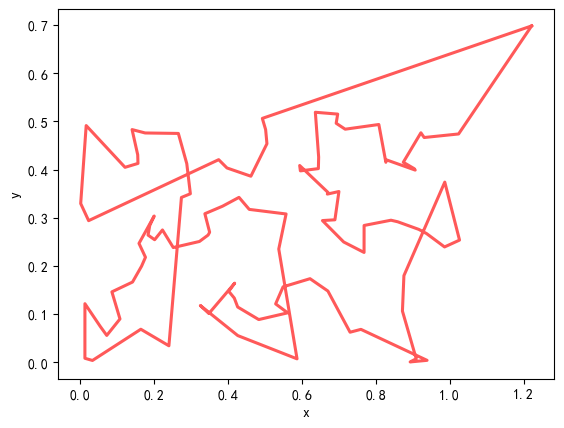

93 77 22 89
[0, 16, 34, 94, 92, 42, 35, 45, 58, 51, 100, 98, 20, 55, 99, 97, 37, 43, 79, 49, 50, 41, 14, 19, 29, 73, 82, 86, 91, 1, 66, 44, 2, 81, 47, 13, 26, 71, 9, 83, 17, 39, 78, 76, 30, 84, 63, 10, 68, 75, 93, 69, 64, 96, 59, 8, 4, 74, 32, 72, 3, 40, 90, 15, 60, 87, 56, 27, 48, 46, 77, 38, 7, 85, 61, 25, 65, 80, 24, 67, 6, 21, 70, 36, 31, 12, 23, 18, 62, 28, 33, 89, 57, 22, 11, 52, 53, 54, 95, 5]


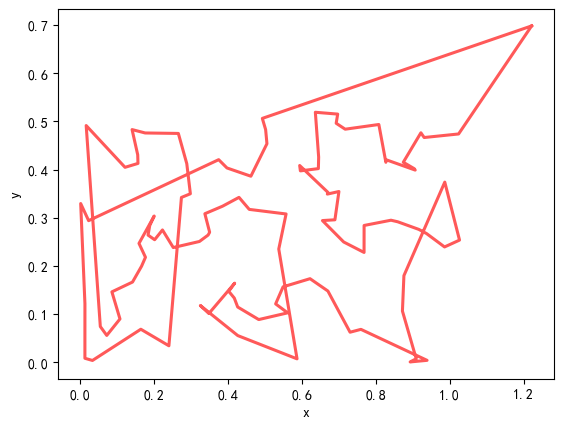

In [243]:
str_list= pd.read_excel(io='./Start.xlsx', sheet_name='Sheet1')
str_list = list(str_list.columns)
#CityCoordinates = []
str_list.pop()
#str_list.append(1)
#print(str_list)

#for ind in str_list:
#print(ind)
#CityCoordinates.append(data[ind-1])
#print(CityCoordinates)

pops = \
    [random.sample([i for i in list(range(len(CityCoordinates)))], len(CityCoordinates)) for
     j in range(popsize-1)]
pops.append(str_list)
print(str_list)
#画出随机得到的城市连接图
draw_path(str_list, CityCoordinates)
exp=[(22,89)]
str_list1 = expAl(str_list,exp)
print(str_list1)
draw_path(str_list1, CityCoordinates)

In [234]:
# 交叉算子
def crossover(popsize, parent1_pops, parent2_pops, pc):
    child_pops = []
    for i in range(popsize):
        # 初始化
        child = [None] * len(parent1_pops[i])
        parent1 = parent1_pops[i]
        parent2 = parent2_pops[i]
        if random.random() >= pc:
            child = parent1.copy()  # 随机生成一个（或者随机保留父代中的一个）
            random.shuffle(child)
        else:
            # parent1
            start_pos = random.randint(0, len(parent1) - 1)
            end_pos = random.randint(0, len(parent1) - 1)
            if start_pos > end_pos:
                tem_pop = start_pos
                start_pos = end_pos
                end_pos = tem_pop
            child[start_pos:end_pos + 1] = parent1[start_pos:end_pos + 1].copy()
            # parent2 -> child
            list1 = list(range(end_pos + 1, len(parent2)))
            list2 = list(range(0, start_pos))
            list_index = list1 + list2
            print(list_index)
            j = -1
            for i in list_index:
                for j in range(j + 1, len(parent2)):
                    if parent2[j] not in child:
                        child[i] = parent2[j]
                        break
        child_pops.append(child)
    return child_pops

In [ ]:
# 路径顺序
print(best_pop)

draw_path(best_pop, CityCoordinates)

上一次最优 43049.0
[48, 27, 87, 56, 46, 77, 38, 7, 62, 18, 28, 33, 65, 25, 61, 85, 89, 22, 57, 80, 24, 67, 6, 21, 70, 36, 31, 11, 52, 53, 54, 95, 88, 5, 0, 16, 94, 34, 35, 42, 92, 58, 45, 51, 100, 98, 20, 55, 99, 43, 37, 97, 50, 79, 49, 14, 41, 19, 29, 73, 82, 86, 91, 2, 44, 66, 1, 81, 47, 71, 13, 26, 9, 83, 17, 39, 78, 30, 96, 64, 93, 69, 68, 75, 10, 63, 84, 76, 59, 8, 4, 74, 32, 72, 3, 40, 90, 12, 23, 15, 60]


C:\Users\28739\AppData\Local\Temp\ipykernel_11568\3285687064.py:125: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'r-', color='#FF3030', alpha=0.8, linewidth=2.2)


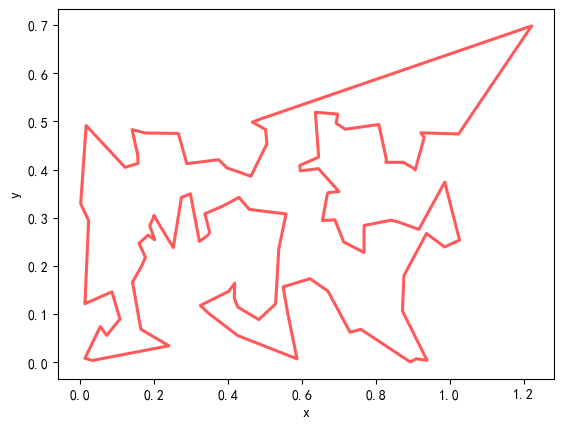

77 78 30 96
11 12 33 65
15 16 85 89
63 62 2 91
4 3 46 56
98 92 30 96
47 20 33 65
70 98 85 89
69 26 2 91
41 6 46 56
53 27 30 96
94 72 33 65
5 55 85 89
40 38 2 91
96 46 46 56
66 21 30 96
86 71 33 65
7 61 85 89
37 75 2 91
74 55 46 56
81 99 30 96
34 62 33 65
100 77 85 89
33 62 2 91
10 60 46 56
80 88 30 96
32 74 33 65
78 69 85 89
4 73 46 56
7 38 30 96
60 90 33 65
79 59 85 89
86 15 2 91
17 69 46 56
29 9 30 96
20 68 33 65
50 78 85 89
13 1 2 91
43 16 46 56
63 96 30 96
95 92 33 65
9 35 85 89
45 24 2 91
79 78 46 56
86 0 30 96
98 34 33 65
68 17 85 89
48 45 2 91
80 6 46 56
15 95 30 96
58 52 33 65
86 1 85 89
44 20 2 91
45 33 46 56
51 45 30 96
15 40 33 65
73 100 85 89
30 66 2 91
5 24 46 56
28 83 30 96
9 83 33 65
68 7 85 89
77 20 2 91
19 26 46 56
9 74 30 96
82 37 33 65
77 68 85 89
77 85 2 91
43 52 46 56
78 28 30 96
47 57 33 65
26 2 85 89
21 58 2 91
17 23 46 56
9 96 30 96
100 12 33 65
4 21 85 89
28 56 2 91
89 9 46 56
39 59 30 96
93 70 33 65
46 4 85 89
66 63 2 91
83 0 46 56
22 16 30 96
32 57 33 65
29 3

In [ ]:
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl

# 添加这条可以让图形显示中文，字体显示为黑体
mpl.rcParams['font.sans-serif'] = ['SimHei']

import math
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl

# 添加这条可以让图形显示中文，字体显示为黑体
mpl.rcParams['font.sans-serif'] = ['SimHei']



# 适应度的计算
def calFitness(line, dis_matrix):
    # 贪婪策略得到距离矩阵（解码过程）
    # 计算路径距离（评价函数）
    dis_sum = 0  # 路线距离
    dis = 0
    for i in range(len(line)):
        if i < len(line) - 1:
            # 依次计录一个数以及下一个数的距离，存入城市间的距离矩阵
            dis = dis_matrix.loc[line[i], line[i + 1]]
            dis_sum = dis_sum + dis
        else:
            # 最后一个数，无下一个数的情况
            dis = dis_matrix.loc[line[i], line[0]]
            dis_sum = dis_sum + dis
    # 返回城市间的路线距离矩阵
    return round(dis_sum, 1)


# 联赛选择算子
def tournament_select(pops, popsize, fits, tournament_size):
    new_pops, new_fits = [], []
    # 步骤1 从群体中随机选择M个个体，计算每个个体的目标函数值
    while len(new_pops) < len(pops):
        tournament_list = random.sample(range(0, popsize), tournament_size)
        tournament_fit = [fits[i] for i in tournament_list]
        # 转化为df方便索引
        tournament_df = pd.DataFrame \
            ([tournament_list, tournament_fit]).transpose().sort_values(by=1).reset_index(drop=True)
        # 步骤2 根据每个个体的目标函数值，计算其适应度
        fit = tournament_df.iloc[0, 1]
        pop = pops[int(tournament_df.iloc[0, 0])]
        # 步骤3 选择适应度最大的个体
        new_pops.append(pop)
        new_fits.append(fit)
    return new_pops, new_fits


# 交叉算子
def crossover(popsize, parent1_pops, parent2_pops, pc):
    child_pops = []
    for i in range(popsize):
        # 初始化
        child = [None] * len(parent1_pops[i])
        parent1 = parent1_pops[i]
        parent2 = parent2_pops[i]
        if random.random() >= pc:
            child = parent1.copy()  # 随机生成一个（或者随机保留父代中的一个）
            random.shuffle(child)
        else:
            # parent1
            start_pos = random.randint(0, len(parent1) - 1)
            end_pos = random.randint(0, len(parent1) - 1)
            if start_pos > end_pos:
                tem_pop = start_pos
                start_pos = end_pos
                end_pos = tem_pop
            child[start_pos:end_pos + 1] = parent1[start_pos:end_pos + 1].copy()
            # parent2 -> child
            list1 = list(range(end_pos + 1, len(parent2)))
            list2 = list(range(0, start_pos))
            list_index = list1 + list2
            j = -1
            for i in list_index:
                for j in range(j + 1, len(parent2)):
                    if parent2[j] not in child:
                        child[i] = parent2[j]
                        break
        child_pops.append(child)
    return child_pops


# 变异操作
def mutate(pops, pm):
    pops_mutate = []
    for i in range(len(pops)):
        pop = pops[i].copy()
        # 随机多次成对变异
        # 随机选出两个位置进行交换
        t = random.randint(1, 5)
        count = 0
        while count < t:
            if random.random() < pm:
                mut_pos1 = random.randint(0, len(pop) - 1)
                mut_pos2 = random.randint(0, len(pop) - 1)
                #如果不相等则进行取反的操作，这里使用交换
                if mut_pos1 != mut_pos2:
                    tem = pop[mut_pos1]
                    pop[mut_pos1] = pop[mut_pos2]
                    pop[mut_pos2] = tem
            pops_mutate.append(pop)
            count += 1
    return pops_mutate


# 画路径图
def draw_path(line, CityCoordinates):
    x, y = [], []
    for i in line:
        Coordinate = CityCoordinates[i]
        x.append(Coordinate[0])
        y.append(Coordinate[1])
    x.append(x[0])
    y.append(y[0])
    plt.plot(x, y, 'r-', color='#FF3030', alpha=0.8, linewidth=2.2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#启发式算法
def expAl(line, exp):
    for turp in exp:
        p1=0
        p2=0
        for i in turp:
            if p1 == 0:
                p1 = line.index(i)
            else:
                p2 = line.index(i)
                if p2>p1:
                    print(p1,p2,line[p1],line[p2])
                    temp = line[p1+1:p2+1]
                    temp.reverse()
                    line[p1+1:p2+1] = temp
                else:
                    p2 = line.index(i)
                    print(p1,p2,line[p1],line[p2])
                    temp = line[p2+1:p1+1]
                    temp.reverse()
                    line[p2+1:p1+1] = temp

    return line

def read():
    temp = pd.read_excel(io='./datamoni.xlsx', sheet_name='Sheet1', index_col=[0,1],usecols=[0,1])
    temp = list(temp.index[0:])
    temp.insert(0,(70,40))
    CityCoordinates=[]
    for x, y in temp:
        x = x*math.pi/180.0
        y = y*math.pi/180.0
        CityCoordinates.append([x, y])
    str_list= pd.read_excel(io='./Start.xlsx', sheet_name='Sheet1')
    str_list = list(str_list.columns)

    return CityCoordinates,str_list



if __name__ == '__main__':
    # 参数
    #CityNum = 20  # 城市数量
    #MinCoordinate = 0  # 二维坐标最小值
    #MaxCoordinate = 101  # 二维坐标最大值
    # GA参数
    print('上一次最优 %.1f' % (best_fit))
    print(str_list)
    generation = 5000 # 迭代次数
    popsize = 500  # 种群大小
    tournament_size = 5  # 锦标赛小组大小
    pc = 0.95  # 交叉概率
    pm = 0.4  # 变异概率

    R=6370

    # 随机生成城市的坐标,城市序号为0,1,2,3...直到CityNum的数目20
    #CityCoordinates = \
    #    [(random.randint(MinCoordinate, MaxCoordinate), random.randint(MinCoordinate, MaxCoordinate)) for
    #     i in range(CityNum)]
    # 计算城市之间的距离
    CityCoordinates, str_list = read()
    str_list = str
    dis_matrix = \
        pd.DataFrame(data=None, columns=range(len(CityCoordinates)), index=range(len(CityCoordinates)))
    dis_matrix = \
        pd.DataFrame(data=None, columns=range(len(CityCoordinates)), index=range(len(CityCoordinates)))
    for i in range(len(CityCoordinates)):
        xi, yi = CityCoordinates[i][0], CityCoordinates[i][1]
        for j in range(len(CityCoordinates)):
            xj, yj = CityCoordinates[j][0], CityCoordinates[j][1]
            a=math.cos(xi-xj)*math.cos(yi)*math.cos(yj)+math.sin(yi)*math.sin(yj)
            if a>1:
                a=1
            dis_matrix.iloc[i, j] = round(R*math.acos(a))

    iteration = 0
    # 初始化,随机构造
    pops = \
        [random.sample([i for i in list(range(len(CityCoordinates)))], len(CityCoordinates)) for
         j in range(popsize)]
    pops[0]=str_list
    #画出随机得到的城市连接图
    draw_path(pops[0], CityCoordinates)
    #启发
    exp=exps
    for i in range(len(pops)):
        pops[i]=expAl(pops[i],exp)
    # 计算适应度
    fits = [None] * popsize
    for i in range(popsize):
        fits[i] = calFitness(pops[i], dis_matrix)
    # 保留当前最优,最小的fits为最优解
    best_fit = min(fits)
    best_pop = pops[fits.index(best_fit)]

    print('初代最优值 %.1f' % (best_fit))
    best_fit_list = []
    best_fit_list.append(best_fit)
    
    count=0#设置终止条件

    while iteration <= generation:
        # 锦标赛赛选择
        pop1, fits1 = tournament_select(pops, popsize, fits, tournament_size)
        pop2, fits2 = tournament_select(pops, popsize, fits, tournament_size)
        # 交叉
        child_pops = crossover(popsize, pop1, pop2, pc)
        # 变异
        child_pops = mutate(child_pops, pm)
        # 计算子代适应度
        child_fits = [None] * popsize
        for i in range(popsize):
            child_fits[i] = calFitness(child_pops[i], dis_matrix)
            # 一对一生存者竞争
        for i in range(popsize):
            if fits[i] > child_fits[i]:
                fits[i] = child_fits[i]
                pops[i] = child_pops[i]

        if best_fit > min(fits):
            best_fit = min(fits)
            best_pop = pops[fits.index(best_fit)]
            count=0
        else:
            count += 1

        best_fit_list.append(best_fit)

        print('第%d代最优值 %.1f' % (iteration, best_fit))
        iteration += 1
        
        if count == 300:
            break

    # 路径顺序
    print(best_pop)
    print('ReStart')
    print(str_list)
    draw_path(best_pop, CityCoordinates)

In [7]:
exps = [(30,96),(33,65),(85,89),(2,91),(46,56)]
str = [48, 27, 87, 56, 46, 77, 38, 7, 62, 18, 28, 33, 65, 25, 61, 85, 89, 22, 57, 80, 24, 67, 6, 21, 70, 36, 31, 11, 52, 53, 54, 95, 88, 5, 0, 16, 94, 34, 35, 42, 92, 58, 45, 51, 100, 98, 20, 55, 99, 43, 37, 97, 50, 79, 49, 14, 41, 19, 29, 73, 82, 86, 91, 2, 44, 66, 1, 81, 47, 71, 13, 26, 9, 83, 17, 39, 78, 30, 96, 64, 93, 69, 68, 75, 10, 63, 84, 76, 59, 8, 4, 74, 32, 72, 3, 40, 90, 12, 23, 15, 60]

68 67 46 56
104


C:\Users\28739\AppData\Local\Temp\ipykernel_17464\2121136149.py:116: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'r-', color='#FF3030', alpha=0.8, linewidth=2.2)


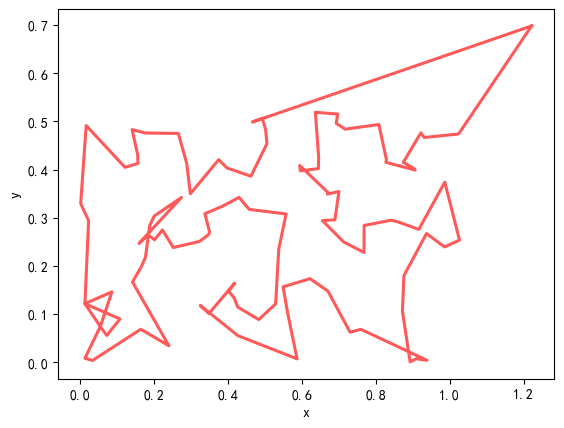

[0, 16, 34, 94, 92, 42, 35, 58, 45, 51, 100, 98, 20, 55, 99, 97, 37, 43, 79, 49, 50, 41, 14, 19, 29, 73, 82, 86, 91, 2, 44, 66, 1, 81, 47, 26, 13, 71, 9, 83, 17, 39, 78, 30, 96, 96, 64, 69, 93, 75, 68, 10, 63, 84, 76, 59, 8, 4, 74, 32, 72, 3, 40, 90, 15, 60, 87, 56, 46, 23, 48, 27, 77, 38, 7, 18, 62, 28, 33, 65, 85, 89, 65, 25, 61, 89, 22, 57, 80, 24, 67, 6, 21, 70, 36, 31, 12, 11, 52, 53, 54, 95, 5, 88]
45855


In [294]:
str = expAl(str,[(46,56)])

draw_path(str,CityCoordinates)
res = calFitness(str,dis_matrix)
print(str)
print(res)